# Trabalho 05 de Métodos Quantitativos
###### Pedro Henrique Ventura 
###### Aluno de Sistemas Multimídia da Pós Graduação em Ciência da Computação (2019). Terceiro Trimestre
## Bibliotecas

In [1]:
import scipy 
import math
import pylab

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

### 1. Criação da amostra
#### A amostra aqui criada, simula a evolução de um jogador, aqui dada como "Nível" (eixo X) em um RPG ficticio, onde tenta buscar analisar uma relação entre o "Tempo" (eixo Y) gasto em minutos jogando tal Jogo/RPG.

In [2]:
x = [1,2,3,4,5,6,7,8,9,10]#nivel da conta
y = [10,7,5,20,35,70,66,80,85,120]#média de minutos jogados 
xy = [x,y]

print(xy)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [10, 7, 5, 20, 35, 70, 66, 80, 85, 120]]


### 2. Cálculo de coeficiênte de Correlação

In [3]:
r = np.corrcoef(xy)
r = r[0][1]
r2=(r*r)

print("Coeficiênte de Correlação: {:.2f}".format(r))
print("R²: {:.2f}".format(r2)+"%")

Coeficiênte de Correlação: 0.96
R²: 0.92%


### 3. Estimar parâmetros, verificar a qualidade, calcular os erros

##### Utilizando ferramentas prontas para uma primeira vizualisação

In [4]:
# Tranforma as variáveis em formato específico para a regressão linear
Xr = np.array(x).reshape(-1,1)
Yr = np.array(y).reshape(-1,1)

# Cria e alimenta o modelo
modelo = LinearRegression()
modelo.fit(Xr,Yr)

# Interceptação b0
print("Interceptação no eixoY em X=", modelo.intercept_)

# Inclinação b1
print("Coeficiênte de inclinação:", modelo.coef_)

Interceptação no eixoY em X= [-19.66666667]
Coeficiênte de inclinação: [[12.63030303]]


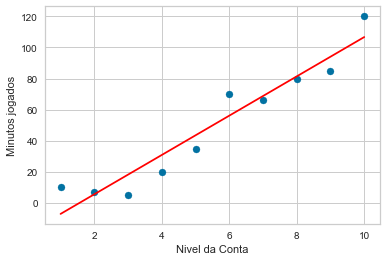

In [5]:
# Grafico
plt.xlabel('Nivel da Conta')
plt.ylabel('Minutos jogados')
plt.scatter(Xr,Yr)
plt.plot(Xr, modelo.predict(Xr),color = 'red')

In [6]:
# Previsão simulada para um nível 12
nivel =12
## Manual
print("Previsao manual do nivel",nivel,":",modelo.intercept_+modelo.coef_*nivel )

## pelo Sklearn
nivelr = [[nivel]] #Formato pedido pelo .predict()
p = modelo.predict(nivelr)
print("Previsao automatica do nivel",nivel,":", p)

Previsao manual do nivel 12 : [[131.8969697]]
Previsao automatica do nivel 12 : [[131.8969697]]


###### Resolvendo com um pouco mais de detalhamento

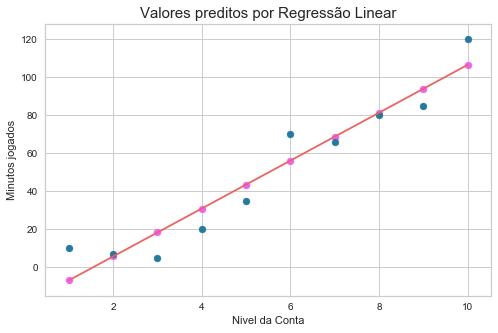

Coeficientes:
b0 :  [-19.66666667]
b1 :  [12.63030303]


In [7]:
#Calculando b0, b1,e a regressão, predizendo com b0 e b1 e plotando

# Regressão Linear
def linear(X, b0, b1):
    return [b0+b1*x for x in X]

# b0 - Intercept (já calculado anteriormente de forma automatica pelo skit)
def intercept(X, Y, b1):
    x_ = np.mean(X)
    y_ = np.mean(Y)
    return y_-b1*x_

# b1 - Slope (Coeficiênte já calculando anteriormente)
def slope(X, Y): 
    x_ = np.mean(X)
    y_ = np.mean(Y)
    rise = sum([(x-x_) * (y-y_) for x,y in zip(X,Y)])
    run = sum([(x-x_)**2 for x,y in zip(X,Y)])
    return rise / run

predictor = Xr
target = Yr

# Calculando b1, b0 e jogando na regressão
b1 = slope(predictor, target)
b0 = intercept(predictor, target, b1)
predicted = linear(predictor, b0, b1)

# Plotando grafico comparativo 
plt.figure(figsize = (8, 5))
plt.plot(predictor, predicted, color = '#f25f5c')
plt.scatter(predictor, predicted, color = '#f25fFF')
plt.title('Valores preditos por Regressão Linear', fontsize = 15)
plt.xlabel('Nivel da Conta')
plt.ylabel('Minutos jogados')
plt.scatter(predictor, target, color = "#247ba0")
plt.show()

print("Coeficientes:\n=============")
print("b0 : ", b0)
print("b1 : ", b1)

In [8]:
#Calcular r2, ssr,sse,sst
def r_squared(Y, Y_HAT):
    ssr, sse, r_sqr = [0]*3
    y_ = np.mean(Y)
    ssr = sum([(y_hat - y_)**2 for y_hat in Y_HAT])
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    sst = sum([(y - y_)**2 for y in Y])
    r_sqr = 1 - (sse / sst)
    return r_sqr,ssr,sse,sst

r2,ssr,sse,sst=r_squared(target, predicted)
print("R²:",r2)
print("SSR:",ssr)
print("SSE:",sse)
print("SST:",sst)

R²: [0.92164877]
SSR: [13160.77575758]
SSE: [1118.82424242]
SST: [14279.6]


### 4. Calcular desvio padrão dos erros e dos parâmetros

In [9]:
# Desvio Padrão 
desvioX = math.sqrt(np.var(x)) # tbm poderia usar np.std(vetor ou conjunto)
print("Desvio padrão de X:", desvioX)

desvioY = math.sqrt(np.var(y))
print("Desvio padrão de Y:", desvioY)

desvioE = math.sqrt(np.var(predicted))
print("Desvio padrão de Erros:", desvioE)

Desvio padrão de X: 2.8722813232690143
Desvio padrão de Y: 37.78835799555201
Desvio padrão de Erros: 36.27778350116743


### 5. Calcular intervalo de confiança dos parâmetros para níveis de confiança de 90%, 95% e 99%

In [10]:
#calcular a matriz média de X (Nível) 
print('\n==== X Nivel ====')
media = Xr.mean(axis=0)                                             
print('\nMédia: {}'.format(media))

## 90%
#Desvio Padrão
dp=0.9
desvio_padrao = np.std(Xr)                                          
conf_int = scipy.stats.norm.interval(dp, loc=media, scale=desvio_padrao) 
print("\nIntervalo de confiança",dp,": ")
print(conf_int)

dp=0.95
conf_int = scipy.stats.norm.interval(dp, loc=media, scale=desvio_padrao) 
print("\nIntervalo de confiança",dp,": ")
print(conf_int)

dp=0.99
conf_int = scipy.stats.norm.interval(dp, loc=media, scale=desvio_padrao) 
print("\nIntervalo de confiança",dp,": ")
print(conf_int)


==== X Nivel ====

Média: [5.5]

Intervalo de confiança 0.9 : 
(array([0.77551765]), array([10.22448235]))

Intervalo de confiança 0.95 : 
(array([-0.12956795]), array([11.12956795]))

Intervalo de confiança 0.99 : 
(array([-1.8985064]), array([12.8985064]))


In [11]:
#calcular a matriz média de Y (Horas Jogadas)
print('\n==== Y Horas Jogadas====')
media = Yr.mean(axis=0)                                             
print('\nMédia: {}'.format(media))

## 90%
#Desvio Padrão
dp=0.9
desvio_padrao = np.std(Yr)                                          
conf_int = scipy.stats.norm.interval(dp, loc=media, scale=desvio_padrao) 
print("\nIntervalo de confiança",dp,": ")
print(conf_int)

dp=0.95
conf_int = scipy.stats.norm.interval(dp, loc=media, scale=desvio_padrao) 
print("\nIntervalo de confiança",dp,": ")
print(conf_int)

dp=0.99
conf_int = scipy.stats.norm.interval(dp, loc=media, scale=desvio_padrao) 
print("\nIntervalo de confiança",dp,": ")
print(conf_int)


==== Y Horas Jogadas====

Média: [49.8]

Intervalo de confiança 0.9 : 
(array([-12.35631771]), array([111.95631771]))

Intervalo de confiança 0.95 : 
(array([-24.26382071]), array([123.86382071]))

Intervalo de confiança 0.99 : 
(array([-47.53635986]), array([147.13635986]))


In [12]:
#calcular a matriz média de Y (Horas Jogadas)
print('\n==== Predição ====')
erros = np.array(predicted)
media = erros.mean(axis=0)                                             
print('\nMédia: {}'.format(media))

## 90%
#Desvio Padrão
dp=0.9
desvio_padrao = np.std(erros)                                          
conf_int = scipy.stats.norm.interval(dp, loc=media, scale=desvio_padrao) 
print("\nIntervalo de confiança",dp,": ")
print(conf_int)

dp=0.95
conf_int = scipy.stats.norm.interval(dp, loc=media, scale=desvio_padrao) 
print("\nIntervalo de confiança",dp,": ")
print(conf_int)

dp=0.99
conf_int = scipy.stats.norm.interval(dp, loc=media, scale=desvio_padrao) 
print("\nIntervalo de confiança",dp,": ")
print(conf_int)


==== Predição ====

Média: [49.8]

Intervalo de confiança 0.9 : 
(array([-9.87164377]), array([109.47164377]))

Intervalo de confiança 0.95 : 
(array([-21.3031491]), array([120.9031491]))

Intervalo de confiança 0.99 : 
(array([-43.64537781]), array([143.24537781]))


## 6. Testar linearidade, independência de erros, erros normais, homocedasticidade (com gráficos)

### Testar Linearidade
#### Como pode ser visto no gráfico a baixo, trata de um sistema linear por partes sem outliers visíveis

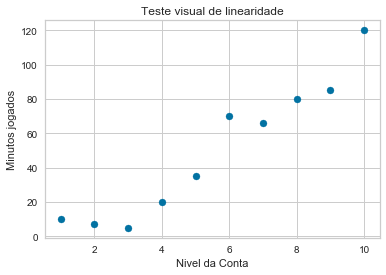

In [13]:
plt.xlabel('Nivel da Conta')
plt.ylabel('Minutos jogados')
plt.title('Teste visual de linearidade')
plt.scatter(Xr,Yr)

### Independência de erros
#### Como pode ser visto nos gráficos a baixo, visualmente não há um padrão/tendência de comportamento

In [14]:
# Diferença dos Residuos
predictY = modelo.predict(Xr)
residuos=[]
residuoTotal =0
for i in range(len(predictY)):
    residuo =Yr[i]-predictY[i]
    
    print("Diferença do Residuo do nivel",i+1,":",residuo)
    residuos.append(float(residuo))

    
    if(residuo<0):
            residuo=residuo*(-1)
    residuoTotal=residuoTotal+residuo

print("\nTotal de Residuos: ", residuoTotal)

Diferença do Residuo do nivel 1 : [17.03636364]
Diferença do Residuo do nivel 2 : [1.40606061]
Diferença do Residuo do nivel 3 : [-13.22424242]
Diferença do Residuo do nivel 4 : [-10.85454545]
Diferença do Residuo do nivel 5 : [-8.48484848]
Diferença do Residuo do nivel 6 : [13.88484848]
Diferença do Residuo do nivel 7 : [-2.74545455]
Diferença do Residuo do nivel 8 : [-1.37575758]
Diferença do Residuo do nivel 9 : [-9.00606061]
Diferença do Residuo do nivel 10 : [13.36363636]

Total de Residuos:  [91.38181818]


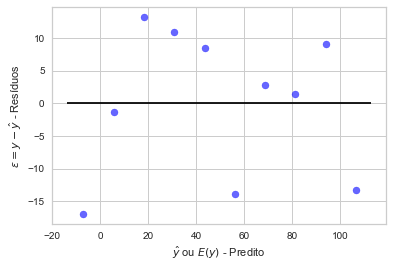

In [15]:
y_hat = modelo.predict(Xr)
res =  y_hat - Yr

plt.scatter(y=res, x=y_hat, color='blue', s=50, alpha=.6)
plt.hlines(y=0, xmin=-14, xmax=113, color='black')
plt.ylabel('$\epsilon = y - \hat{y}$ - Resíduos')
plt.xlabel('$\hat{y}$ ou $E(y)$ - Predito')
plt.show()

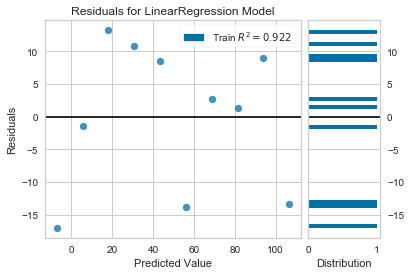

In [16]:
# Residuos individuais e R²
visualizador = ResidualsPlot(modelo)
visualizador.fit(Xr,Yr)
visualizador.poof()

### Erros normais
#### Como pode ser visto nos gráficos a baixo, os valores são anormais por não serem muito próximos a reta.

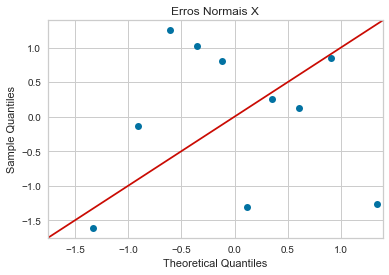

In [17]:
sm.qqplot(res, stats.t, fit=True, line='45')
plt.title('Erros Normais X')
pylab.show()

### Homocedasticidade

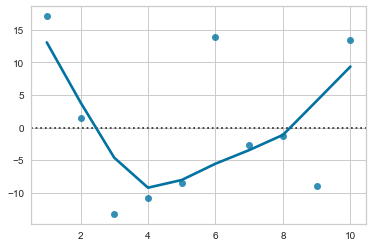

In [18]:
sns.residplot(x, y, lowess=True, color="b")